In [16]:
# Importing the necessary libraries

import requests
import re
import bs4
from bs4 import BeautifulSoup
import sqlite3
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np


In [17]:
# Scrapping the data from the websites using Beautiful Soup

result1=requests.get("https://www.iisertvm.ac.in/")
result2=requests.get("https://www.iiserb.ac.in/")

soup1=bs4.BeautifulSoup(result1.text,"lxml")
soup2=bs4.BeautifulSoup(result2.text,"lxml")

In [18]:
# Making a list of the words on the websites

a=[]
for item in soup1.select('p'):
    a+=item.text.split()
print("Words on the website of IISER TVM are- ",a)

b=[]
for item in soup2.select('p'):
    b+=item.text.split()
print("Words on the website of IISER B are- ",b)


Words on the website of IISER TVM are-  ["'Har", 'Ghar', "Tiranga'", 'campaign', '2024', '-', 'Know', 'More', 'IISER', 'Thiruvananthapuram', 'celebrated', 'its', '12th', 'Convocation', 'on', 'Saturday,', '20th', 'July', '2024', 'Visit', 'of', 'Nobel', 'laureate', 'Prof.', 'Morten', 'P', 'Meldal', 'Know', 'More', 'Nobel', 'laureate', 'Prof.', 'Morten', 'P', 'Meldal', 'inaugurates', 'the', 'Lecture', 'Hall', 'Complex', 'Know', 'More', '11th', 'Convocation', 'of', 'IISER', 'Thiruvananthapuram', 'Know', 'More', 'NEP', 'ki', 'Samajh:', 'Short', 'Video', 'Competition', 'on', 'Implementation', 'of', 'NEP', '2020', 'Know', 'More', 'NEP', 'ki', 'Samajh:', 'Short', 'Video', 'Competition', 'on', 'Implementation', 'of', 'NEP', '2020', 'Know', 'More', 'Nobel', 'laureate', 'Prof.', 'Morten', 'P', 'Meldal', 'addresses', 'the', 'IISER', 'TVM', 'fraternity', 'Know', 'More', 'NEP', 'ki', 'Samajh:', 'Short', 'Video', 'Competition', 'on', 'Implementation', 'of', 'NEP', '2020', 'Know', 'More', 'Inauguratio

In [19]:
# Here we will define a function to clean the lists a bit and make it easier to handle the data

def clean_text(text):
    # Convert text to lowercase for uniformity
    text = text.lower()
    # Remove all non-alphabetic characters and digits (retain spaces)
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    # Remove single-letter words except 'a' and 'i'
    text = re.sub(r'\b(?![ai]\b)[a-z]\b', ' ', text)
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', " ", text).strip()
    return text


In [20]:
# Cleaning the lists
clean_a=[]
for i in range(0,len(a)):
        clean_a.append(clean_text(a[i]))

while("" in clean_a):
       clean_a.remove("")
print("Words on the website of IISER TVM- ",clean_a)

clean_b=[]
for i in range(0,len(b)):
    clean_b.append(clean_text(b[i]))

while("" in clean_a):
       clean_a.remove("")
print("Words on the website of IISER B- ",clean_b)



Words on the website of IISER TVM-  ['har', 'ghar', 'tiranga', 'campaign', 'know', 'more', 'iiser', 'thiruvananthapuram', 'celebrated', 'its', 'th', 'convocation', 'on', 'saturday', 'th', 'july', 'visit', 'of', 'nobel', 'laureate', 'prof', 'morten', 'meldal', 'know', 'more', 'nobel', 'laureate', 'prof', 'morten', 'meldal', 'inaugurates', 'the', 'lecture', 'hall', 'complex', 'know', 'more', 'th', 'convocation', 'of', 'iiser', 'thiruvananthapuram', 'know', 'more', 'nep', 'ki', 'samajh', 'short', 'video', 'competition', 'on', 'implementation', 'of', 'nep', 'know', 'more', 'nep', 'ki', 'samajh', 'short', 'video', 'competition', 'on', 'implementation', 'of', 'nep', 'know', 'more', 'nobel', 'laureate', 'prof', 'morten', 'meldal', 'addresses', 'the', 'iiser', 'tvm', 'fraternity', 'know', 'more', 'nep', 'ki', 'samajh', 'short', 'video', 'competition', 'on', 'implementation', 'of', 'nep', 'know', 'more', 'inauguration', 'of', 'the', 'dst iiser', 'tvm', 'centre', 'on', 'solid state', 'battery', 

In [21]:
# Here we define a function to store the data in an SQlite3 Database.

def store_words_in_db(
    words1: list, db_name: str , table_name : str
) -> None:
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute(f"CREATE TABLE IF NOT EXISTS {table_name} (word TEXT, frequency INTEGER)")

    word_counts = Counter(words1)
    for word, freq in word_counts.items():
        cursor.execute(f"INSERT INTO {table_name} (word, frequency) VALUES (?, ?)", (word, freq))

    conn.commit()
    conn.close()

In [22]:
# Storing the words

store_words_in_db(clean_a,'tvm_dbcln','tvm_wordscln')
store_words_in_db(clean_b,'bhopal_dbcln','bhopal_wordscln')


In [23]:
# In order to analyse the data, we need to fetch it. Here is the funtion for fetching the data.

def fetch_word_frequency(db_name: str, table_name: str ) -> dict:
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute(f"SELECT word, frequency FROM {table_name}")
    word_freq = dict(cursor.fetchall())
    conn.close()
    return word_freq

In [24]:
T= fetch_word_frequency('tvm_dbcln','tvm_wordscln')
T

{'har': 1,
 'ghar': 1,
 'tiranga': 1,
 'campaign': 2,
 '': 34,
 'know': 10,
 'more': 10,
 'iiser': 6,
 'thiruvananthapuram': 5,
 'celebrated': 1,
 'its': 1,
 'th': 4,
 'convocation': 2,
 'on': 11,
 'saturday': 1,
 'july': 1,
 'visit': 1,
 'of': 23,
 'nobel': 5,
 'laureate': 5,
 'prof': 6,
 'morten': 5,
 'meldal': 5,
 'inaugurates': 1,
 'the': 15,
 'lecture': 1,
 'hall': 1,
 'complex': 3,
 'nep': 6,
 'ki': 3,
 'samajh': 3,
 'short': 3,
 'video': 3,
 'competition': 3,
 'implementation': 3,
 'addresses': 1,
 'tvm': 5,
 'fraternity': 1,
 'inauguration': 2,
 'dst iiser': 1,
 'centre': 1,
 'solid state': 2,
 'battery': 1,
 'development': 1,
 'with': 2,
 'faculty': 1,
 'and': 8,
 'students': 2,
 'frontier': 1,
 'symposium': 5,
 'in': 7,
 'chemistry': 5,
 'ms': 1,
 'phaedria': 1,
 'marie': 1,
 'st': 1,
 'hilaire': 1,
 'our': 1,
 'international': 3,
 'conference': 2,
 'main': 2,
 'group': 2,
 'synthesis': 2,
 'catalysis': 2,
 'credit': 10,
 'aarul': 1,
 'jain': 1,
 'mhz': 1,
 'nmr': 1,
 'iiser 

In [25]:
B= fetch_word_frequency('bhopal_dbcln','bhopal_wordscln')
B

{'centers': 1,
 'of': 20,
 'excellence': 1,
 'publication': 1,
 'and': 6,
 'patents': 1,
 'office': 1,
 'students': 2,
 'affairs': 1,
 'quick': 1,
 'links': 1,
 'annual': 3,
 'maths': 1,
 'symposium': 1,
 'one day': 1,
 'awareness': 1,
 'programme': 1,
 'th': 1,
 'session': 1,
 'nasi': 3,
 'the': 16,
 '': 12,
 'tenth': 1,
 'indian': 3,
 'control': 1,
 'conference': 2,
 'icc': 1,
 'dr': 1,
 'pydi': 1,
 'ganga': 1,
 'mamba': 1,
 'bahubalindruni': 1,
 'dept': 6,
 'electrical': 1,
 'engineering': 2,
 'computer': 1,
 'science': 5,
 'has': 6,
 'been': 7,
 'awarded': 2,
 'with': 2,
 'wiser': 1,
 'women': 1,
 'involvement': 1,
 'in': 3,
 'research': 2,
 'award': 2,
 'by': 2,
 'indo german': 1,
 'technology': 1,
 'centre': 1,
 'igstc': 1,
 'prof': 5,
 'ram': 1,
 'singh': 1,
 'adjunct': 1,
 'professor': 1,
 'economics': 1,
 'recently': 1,
 'appointed': 1,
 'as': 4,
 'a': 5,
 'member': 1,
 'monetary': 1,
 'policy': 1,
 'committee': 1,
 'mpc': 1,
 'reserve': 1,
 'bank': 1,
 'india': 5,
 'governmen

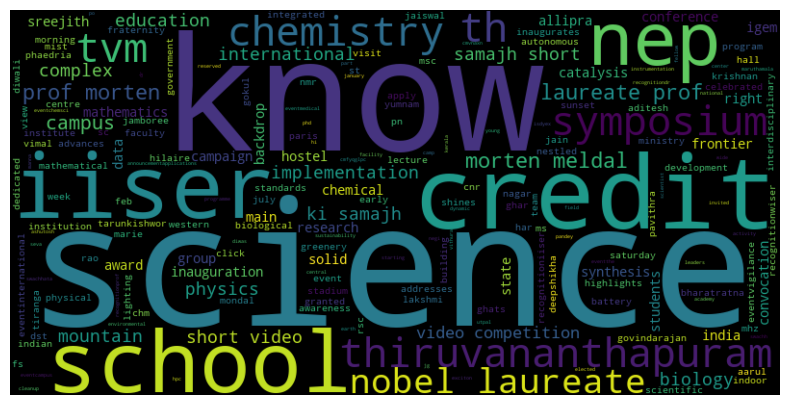

In [26]:
# WordCloud is one of the ways to represent the data, although it's not very accurate.

wordcloud = WordCloud(width=800, height=400).generate(' '.join(clean_a))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

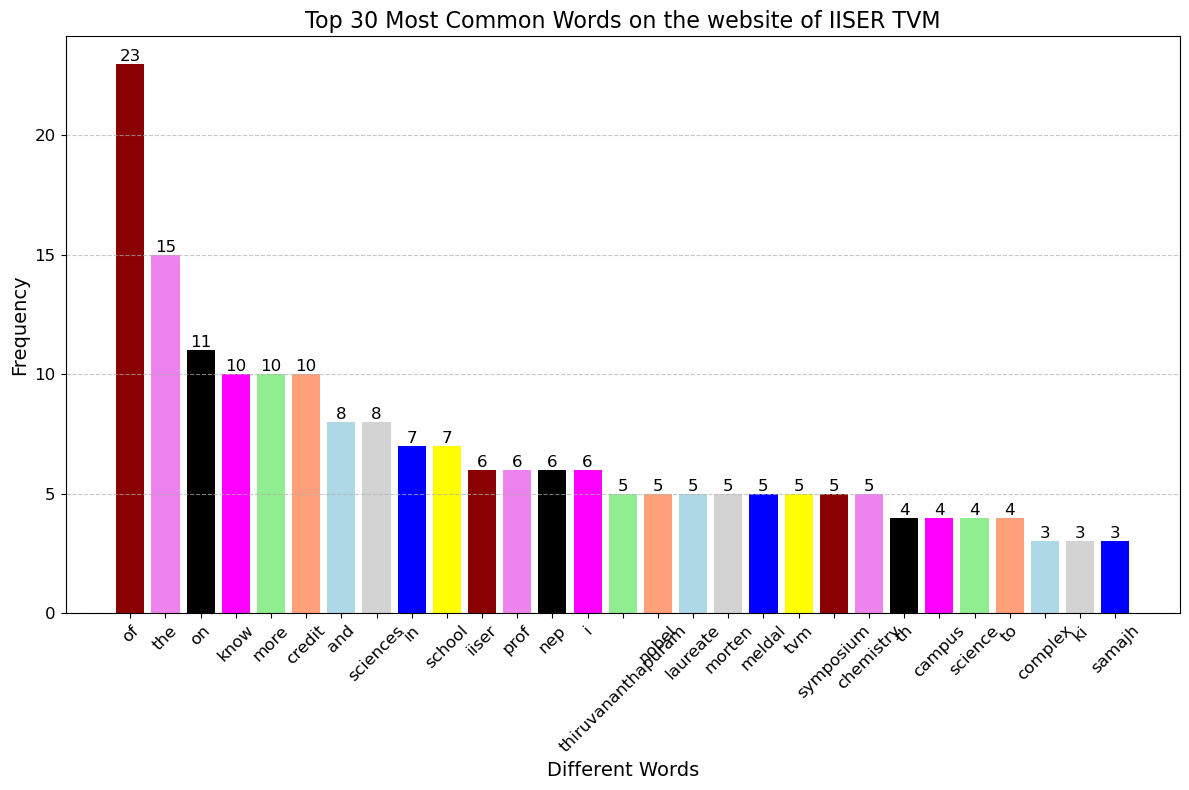

In [27]:
# Now we have created bar charts depicting the most common words on the websites

# Convert dictionary `T` to a Counter object
counter_T = Counter(T)

# Get the 10 most common words (this will work because `counter_T` is now a Counter object)
common_words = counter_T.most_common(30)

# Unzip the list of tuples into two separate lists: `words` and `frequencies`
words, frequencies = zip(*common_words)

# Remove any invalid words (None or empty strings)
valid_words = [word for word in words if word]  # Remove empty strings
valid_frequencies = [freq for word, freq in zip(words, frequencies) if word]  # Remove frequencies where the word is invalid

# Ensure that there is no mismatch after filtering out invalid entries
if len(valid_words) != len(valid_frequencies):
    print("Mismatch between words and frequencies after filtering.")

# Define colors for each bar
colors = ['darkred', 'violet', 'black', 'magenta', 'lightgreen',
          'lightsalmon', 'lightblue', 'lightgray', 'blue', 'yellow']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(valid_words, valid_frequencies, color=colors)
plt.xlabel('Different Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 30 Most Common Words on the website of IISER TVM', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the frequencies
for i, v in enumerate(valid_frequencies):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()


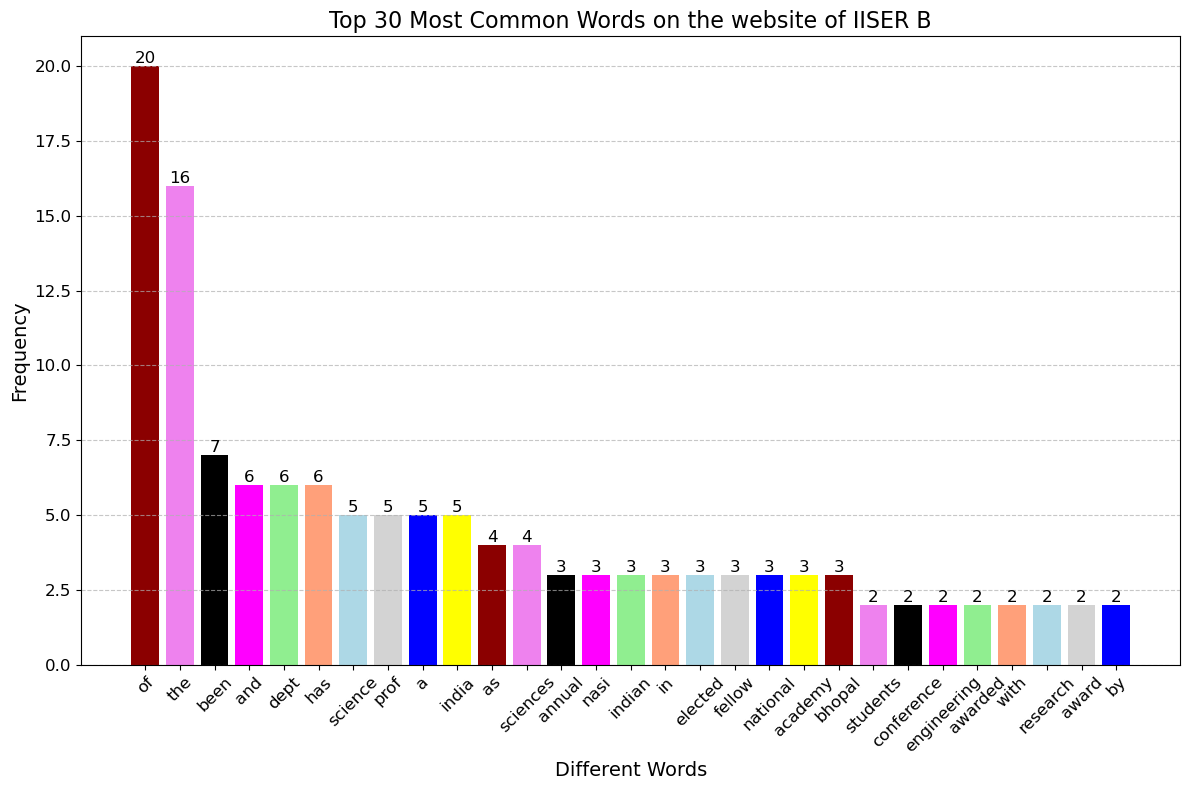

In [28]:
# Convert dictionary `T` to a Counter object
counter_B = Counter(B)

# Get the 10 most common words (this will work because `counter_T` is now a Counter object)
common_words = counter_B.most_common(30)

# Unzip the list of tuples into two separate lists: `words` and `frequencies`
words, frequencies = zip(*common_words)

# Remove any invalid words (None or empty strings)
valid_words = [word for word in words if word]  # Remove empty strings
valid_frequencies = [freq for word, freq in zip(words, frequencies) if word]  # Remove frequencies where the word is invalid

# Ensure that there is no mismatch after filtering out invalid entries
if len(valid_words) != len(valid_frequencies):
    print("Mismatch between words and frequencies after filtering.")

# Define colors for each bar
colors = ['darkred', 'violet', 'black', 'magenta', 'lightgreen',
          'lightsalmon', 'lightblue', 'lightgray', 'blue', 'yellow']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(valid_words, valid_frequencies, color=colors)
plt.xlabel('Different Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 30 Most Common Words on the website of IISER B', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the frequencies
for i, v in enumerate(valid_frequencies):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()


In [29]:
# We have also compared the frequency of the common words between the two websites.

common_words=[]
tvm={}
bhp={}
for i in B:
  for j in T:
    if i==j:
      common_words.append(i)

for word in common_words:
  tvm[word] = T[word]
  bhp[word] = B[word]

# Check if the key exists before attempting to delete it
if '' in common_words:
  while("" in common_words):
    common_words.remove("")

# Check if the key exists before attempting to delete it
if '' in tvm:
  del tvm['']
# Check if the key exists before attempting to delete it
if '' in bhp:
  del bhp['']


print("Frequencies of the common words on website of IISER TVM: ",tvm)
print("Frequencies of the common words on website of IISER B: ",bhp)

Frequencies of the common words on website of IISER TVM:  {'of': 23, 'and': 8, 'students': 2, 'symposium': 5, 'awareness': 1, 'programme': 1, 'th': 4, 'the': 15, 'indian': 1, 'conference': 2, 'dr': 1, 'science': 4, 'with': 2, 'in': 7, 'research': 2, 'award': 2, 'centre': 1, 'prof': 6, 'as': 2, 'a': 1, 'india': 2, 'government': 1, 'biological': 1, 'sciences': 8, 'elected': 1, 'fellow': 1, 'national': 1, 'academy': 1, 'chemistry': 5, 'phd': 1, 'from': 1, 'for': 3, 'st': 1, 'international': 3, 'school': 7, 'on': 11, 'physics': 2, 'ms': 1, 'institute': 1, 'education': 3}
Frequencies of the common words on website of IISER B:  {'of': 20, 'and': 6, 'students': 2, 'symposium': 1, 'awareness': 1, 'programme': 1, 'th': 1, 'the': 16, 'indian': 3, 'conference': 2, 'dr': 1, 'science': 5, 'with': 2, 'in': 3, 'research': 2, 'award': 2, 'centre': 1, 'prof': 5, 'as': 4, 'a': 5, 'india': 5, 'government': 1, 'biological': 2, 'sciences': 4, 'elected': 3, 'fellow': 3, 'national': 3, 'academy': 3, 'chemist

<Figure size 1400x800 with 0 Axes>

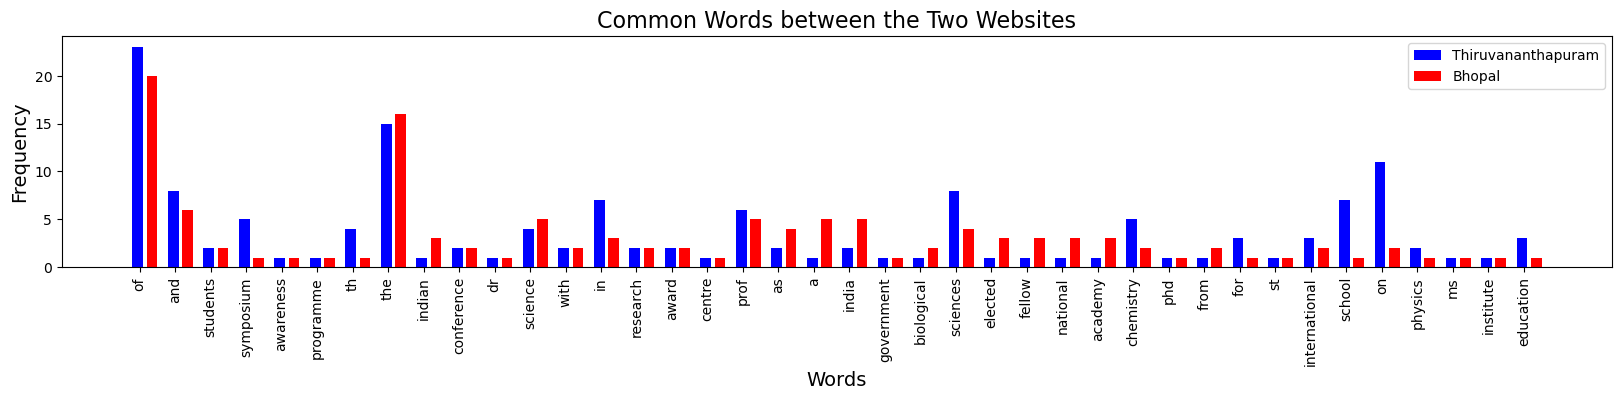

In [30]:
# Plotting the frequencies of the common words

bar_width=0.3
spacing=10

plt.figure(figsize=(14, 8))

tvm_graph=range(len(tvm))

X_axis = np.arange(len(common_words))

plt.figure(figsize=(20, 3))
plt.bar(X_axis, list(tvm.values()), width=0.3, label= "Thiruvananthapuram", align='edge', color='blue')
plt.bar(X_axis + 0.4, list(bhp.values()), width=0.3, label= "Bhopal", align='edge', color='red')
plt.xticks(X_axis+0.2, list(tvm.keys()), rotation= 90)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Common Words between the Two Websites', fontsize=16)
plt.legend(prop ={'size': 10})


plt.show()